# Projeto 1 - SCC5809 - Redes Neurais e Aprendizado Profundo

## Wine - Classificação

### 1. Bibliotecas necessárias:

In [677]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [678]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
#Geração de gráficos:
import matplotlib.pyplot as plt
#Bibliotecas específicas para o aprendizado de máquina:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

### 2. Extração, Carregamento e Transformação dos Dados (Etapa Extract, Load and Transform)

#### Importando o Dataset e Carregando em DataFrame (Extract and Load)

In [679]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

#Criação do DataFrame em Pandas:
X = pd.DataFrame(X)
y = pd.DataFrame(y)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

#### Metadados da Base de Dados:

In [680]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Normalizando a Base de Dados (Transform):

In [681]:
escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)

### 3. Classificação MLP

#### Inicializando o Treinamento em uma Rede MLP:

In [682]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.3) # Treino - 70% e Teste 30%

In [683]:
rna = MLPClassifier(hidden_layer_sizes=(100,50), # Duas camadas - 1ª Camada Intermediária com 100 Neurônios e 2ª com 50.
                    max_iter=1000, # 1000 iterações
                    tol=0.0000001, # Tolerância/erro de 1*10^(-7)
                    learning_rate_init=0.1, # Taxa de aprendizado de 0.1 (inicial)
                    solver='sgd',
                    activation='logistic',
                    learning_rate="constant",
                    verbose=2,
                    momentum=0.9 # Momento de 0.9
                    )

In [684]:
rna.fit(X_norm_train, Y_train)

Iteration 1, loss = 1.11758899
Iteration 2, loss = 1.08842181
Iteration 3, loss = 1.08945822
Iteration 4, loss = 1.08962532
Iteration 5, loss = 1.08452224
Iteration 6, loss = 1.07946106
Iteration 7, loss = 1.07599789
Iteration 8, loss = 1.07273091
Iteration 9, loss = 1.06882174
Iteration 10, loss = 1.06442986
Iteration 11, loss = 1.05973303
Iteration 12, loss = 1.05465826
Iteration 13, loss = 1.04908674
Iteration 14, loss = 1.04294676
Iteration 15, loss = 1.03617512
Iteration 16, loss = 1.02868341
Iteration 17, loss = 1.02036008
Iteration 18, loss = 1.01107846
Iteration 19, loss = 1.00069660
Iteration 20, loss = 0.98905439
Iteration 21, loss = 0.97597354
Iteration 22, loss = 0.96126012
Iteration 23, loss = 0.94470914
Iteration 24, loss = 0.92611195


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 25, loss = 0.90526796
Iteration 26, loss = 0.88200166
Iteration 27, loss = 0.85618519
Iteration 28, loss = 0.82776565
Iteration 29, loss = 0.79679436
Iteration 30, loss = 0.76345280
Iteration 31, loss = 0.72806755
Iteration 32, loss = 0.69110614
Iteration 33, loss = 0.65314874
Iteration 34, loss = 0.61483725
Iteration 35, loss = 0.57681193
Iteration 36, loss = 0.53965070
Iteration 37, loss = 0.50382533
Iteration 38, loss = 0.46968146
Iteration 39, loss = 0.43744103
Iteration 40, loss = 0.40721952
Iteration 41, loss = 0.37904961
Iteration 42, loss = 0.35290443
Iteration 43, loss = 0.32871694
Iteration 44, loss = 0.30639459
Iteration 45, loss = 0.28582988
Iteration 46, loss = 0.26690767
Iteration 47, loss = 0.24951042
Iteration 48, loss = 0.23352177
Iteration 49, loss = 0.21882904
Iteration 50, loss = 0.20532487
Iteration 51, loss = 0.19290816
Iteration 52, loss = 0.18148451
Iteration 53, loss = 0.17096637
Iteration 54, loss = 0.16127291
Iteration 55, loss = 0.15232977
Iteratio

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', tol=1e-07,
              verbose=2)

#### Acurácia - Treino e Teste

In [685]:
# Acurácia Treino:
train_accuracy = rna.score(X_norm_train, Y_train)
print(f"Acurácia no conjunto de treino: {train_accuracy * 100:.2f}%")

Acurácia no conjunto de treino: 100.00%


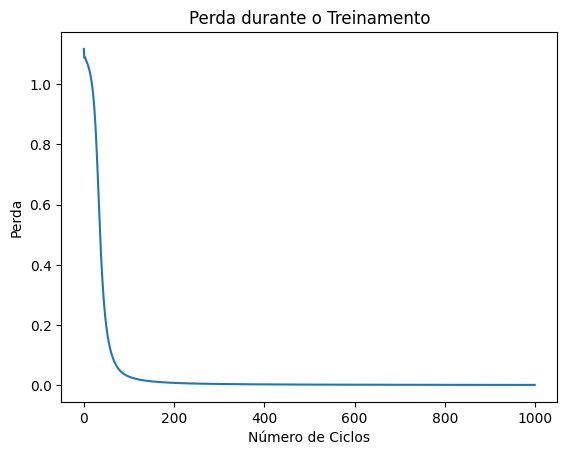

In [686]:
num_ciclos = rna.n_iter_
curva_perda = rna.loss_curve_

# Plotar a curva de perda
plt.plot(curva_perda)
plt.title('Perda durante o Treinamento')
plt.xlabel('Número de Ciclos')
plt.ylabel('Perda')
plt.show()

# Prever os valores de saída
Y_rna_predict = rna.predict(X_norm_train)

In [687]:
Y_rna_previsao = rna.predict(X_norm_test)
r2 = r2_score(Y_test, Y_rna_previsao)
print(r2)

0.9318181818181818


In [688]:
# Acurácia Teste:
test_accuracy = rna.score(X_norm_test, Y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

Acurácia no conjunto de teste: 96.30%


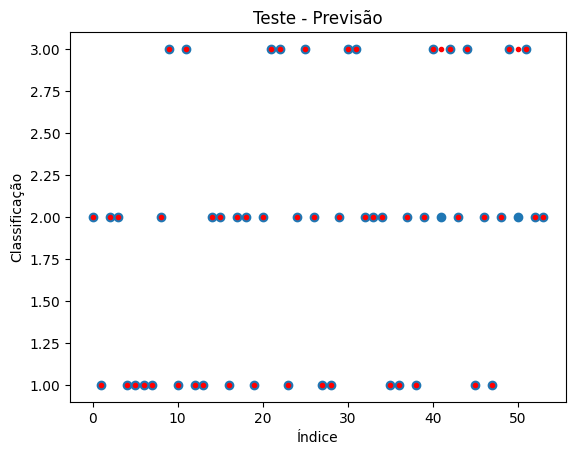

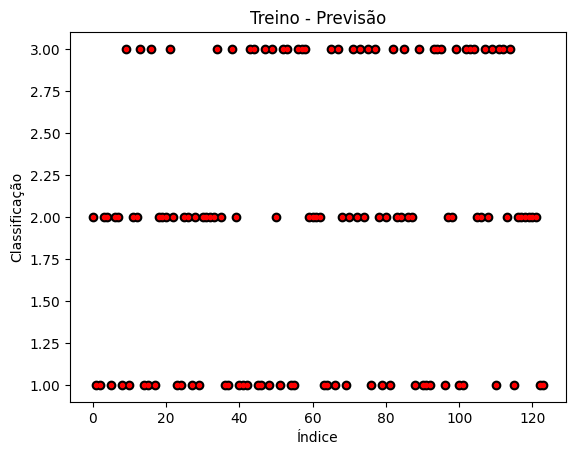

In [689]:
x_i = [x for x in range(len(Y_test))]
x_j = [x for x in range(len(Y_rna_predict))]
plt.scatter(x_i, Y_test)
plt.scatter(x_i, Y_rna_previsao, color="Red", marker='.')
plt.title('Teste - Previsão')
plt.xlabel('Índice')
plt.ylabel('Classificação')
plt.show()
plt.scatter(x_j, Y_rna_predict, color="black")
plt.scatter(x_j, Y_train, color="Red", marker='.')
plt.title('Treino - Previsão')
plt.xlabel('Índice')
plt.ylabel('Classificação')
plt.show()

#### Tabela final de Dados

In [690]:
tabela_final_classificacao = pd.DataFrame(columns=['Separação Treino/Teste', 
                                                   'Arquitetura', 
                                                   'Número de Ciclos', 
                                                   'Velocidade de Aprendizado', 
                                                   'Momentum', 
                                                   'Acurácia Treino', 
                                                   'Acurácia Teste', 
                                                   'R2'])

In [691]:
tabela_final_classificacao.loc[0] = ['70/30', 
                                      'hidden_layer_sizes=(100,50)', 
                                      1000, 
                                      0.1, 
                                      0.9, 
                                      str(round(train_accuracy*100.00,2))+'%',
                                      str(round(test_accuracy*100.00,2))+'%',
                                      round(r2,3)]

In [692]:
tabela_final_classificacao

,Separação Treino/Teste,Arquitetura,Número de Ciclos,Velocidade de Aprendizado,Momentum,Acurácia Treino,Acurácia Teste,R2
0,70/30,"hidden_layer_sizes=(100,50)",1000,0.1,0.9,100.0%,96.3%,0.932


## Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html